<img src="../../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Python Bootcamp and Summer Workshop on the Dynamic Brain</h1> 
<h3 align="center">Wednesday, August 23, 2017</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Drive path</h2>

<p>First things first - let's make sure your drive path is set up appropriately. All these files are already saved in the AWS directory drive path below.
</div>

In [4]:
#make sure your drive path is correct! 
# macOS/OS X
# drive_path = '/Volumes/Brain2017/data/dynamic-brain-workshop/modeling/'

# Windows (a good guess)
# drive_path = 'e:/data/dynamic-brain-workshop/modeling'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2017/data/dynamic-brain-workshop/modeling'

# AWS
drive_path = '/data/dynamic-brain-workshop/modeling/'

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Import some useful packages.
</div>

In [5]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import json
import matplotlib

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>1. Plotting spikes</h2>

<p>Let us load spikes from one simulation.

<p>First, provide the name of a file with spikes.  Each file like that contains two columns -- cell id and spike time.  Each time a cell spikes, a new row with the cell id and the spike time is added to the file.  Because these simulations typicaly run in parallel on many cores, the rows in the spike file are unsorted.

<p>Load the data into a numpy array and print the shape.
</div>

In [6]:
# This is where responses to natural movies for model called LL2 are stored.
sim_path = 'layer4_spikes/simulations_ll2/natural_movies/'

# This is the name of a directory containing simulation output for one movie clip, trial #9
# (out of 10 trials total for this stimulus).
output_path = os.path.join(drive_path, sim_path, 'output_ll2_TouchOfEvil_frames_3600_to_3750_scrbl_xy_9_sd278/')

# The spike file is always named "spk.dat".
spk_fname = os.path.join(output_path, 'spk.dat')

# Read spikes into a numpy array and print its shape.
# There are a lot of spikes in two columns -- one for cell ids, and the other for spike times.
series = np.genfromtxt(spk_fname, delimiter=' ')
print(series.shape)

(174343, 2)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Now, let us make a raster plot of these spikes.
</div>

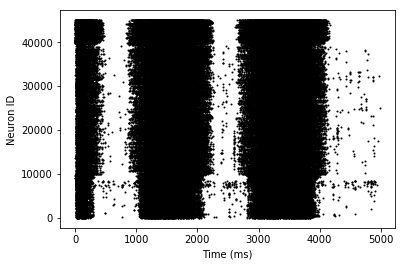

In [7]:
fig, ax = plt.subplots()

# Plot the spikes.
ax.scatter(series[:, 0], series[:, 1], s=1, c='k') #series[:, 0] are neuron IDs, and series[:, 1] are time stamps.
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Neuron ID')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>2. Plotting firing rates.</h2>

<p>We can obtain firing rates from the spikes that we loaded above.  However, firing rates have been already computed in each simulations, and can be simply loaded from the files called "tot_f_rate.dat".

<p>Let us load the data from such a file into a numpy array and print its shape. 
</div>

In [8]:
rate_fname = os.path.join(output_path, 'tot_f_rate.dat') # Reuse the same path from above.

# Read firing rates.
f_rate = np.genfromtxt(rate_fname, delimiter=' ')
print(f_rate.shape)

(45000, 3)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>As we can see, the file contains three columns.  They are the cell id, the firing rate computed for the time that the stimulus was presented, and the firing rate computed for the total time of the simulation (which typically includes a 500 ms interval of gray screen in the beginning).

<p>Most often, we need to use columns 1 and 2.  Note that, unlike the spike file, the rows here are unique in terms of cell ids (one row for each cell id) and are sorted in order of cell ids.

<p>Let us now plot the firing rates of all the cells (as we can see above, 45,000 of them).
</div>

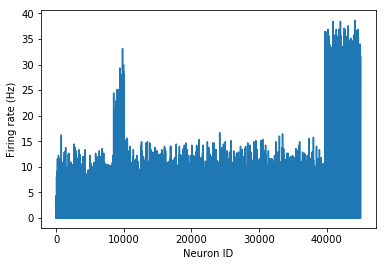

In [9]:
plt.plot(f_rate[:, 0], f_rate[:, 1])
plt.xlabel('Neuron ID')
plt.ylabel('Firing rate (Hz)')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>3. Cell properties.</h2>

What are the cells in the system?  We can actually access them.  Let us load the information about the cells into a pandas dataframe and look at the contents.
</div>

In [10]:
# For each simulated model, like LL2 here, a csv file containing information about
# all cells in the model is provided.
cells_file = os.path.join(drive_path, 'layer4_spikes/build/ll2.csv')
cells_db = pd.read_csv(cells_file, sep=' ')
cells_db.head(n=10)

,index,type,x,y,z,tuning,morphology,cell_par
0,0,Scnn1a,28.753,161.705,5.132,0.0,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
1,1,Scnn1a,90.095,-95.061,-41.935,0.0972972972973,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
2,2,Scnn1a,94.143,337.613,-42.459,0.194594594595,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
3,3,Scnn1a,329.325,-184.809,-5.583,0.291891891892,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
4,4,Scnn1a,-326.973,23.851,2.608,0.389189189189,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
5,5,Scnn1a,-225.722,-190.937,21.341,0.486486486486,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
6,6,Scnn1a,33.756,-336.600,-22.009,0.583783783784,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
7,7,Scnn1a,-225.953,-26.266,-10.029,0.681081081081,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
8,8,Scnn1a,-108.859,359.466,-47.802,0.778378378378,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...
9,9,Scnn1a,84.676,205.233,-34.492,0.875675675676,/data/mat/antona/cell_models/395830185/Scnn1a-...,/data/mat/antona/cell_models/395830185/4723637...


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>As you can see, this file contains information about each cell's ID, coordinates, type, and other assigned properties.


<p>Let us now plot the coordinates of the cells by type.
</div>

In [11]:
# Let's see which cell types we have in the model.  We'll use a different color
# for each type.  The types are given in the column "type".
cell_types = np.unique(cells_db['type'].values)
print('Cell types: ', cell_types)

Cell types:  ['LIF_exc' 'LIF_inh' 'Nr5a1' 'PV1' 'PV2' 'Rorb' 'Scnn1a']


In [12]:
# Now, let's create a dictionary with a mapping of colors to types.
type_colors = {'LIF_exc': 'black',
               'LIF_inh': 'brown',
               'Nr5a1': 'magenta',
               'PV1': 'blue',
               'PV2': 'cyan',
               'Rorb': 'red',
               'Scnn1a': 'darkorange'}

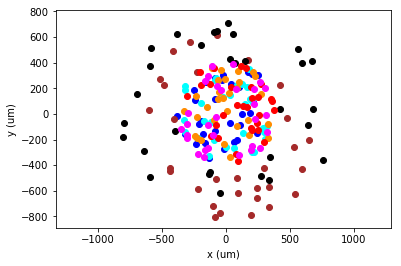

In [13]:
# Let us now iterate through all types and plot (x, y) positions of
# 30 cells for each type (only plot 30 cells because otherwise the plot becomes too messy).

for type_key in type_colors:
    tmp_db = cells_db[cells_db['type']==type_key] # Slice of the dataframe with all the cells of a given type.
    plt.scatter(tmp_db['x'][:30], tmp_db['y'][:30], c=type_colors[type_key])
    plt.axis('equal')
plt.xlabel('x (um)')
plt.ylabel('y (um)')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
Apparently, the cells are distributed within concentric circles in the x and y dimensions!
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h2> Excercise 1.  Plot spikes colored by cell type.</h2>

<p>Let us now combine information about spikes and cells into a plot where same colors as above are used.

<p>Can you plot spikes from the movie as shown above, and color them by cell type?

<p>Hint: you will need neuron IDs of the cells of a particular type (the column "index" in the cells file); use them as indices for the spikes from the 'series' array, using the command

<p>type_ind = np.in1d(series[:, 1], cell_ids).
</div>

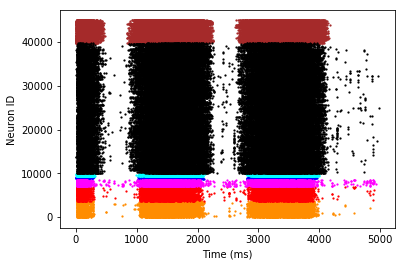

In [14]:
for type_key in type_colors:
    gids = cells_db[cells_db['type'] == type_key]['index'].values # 'Global IDs', or gids of the neurons of this type.
    
    # Use a numpy trick to find indices of all elements (here, neuron IDs from 'series') that belong to the array 'gids'.
    type_ind  = np.in1d(series[:, 1], gids)
    
    plt.scatter(series[type_ind, 0], series[type_ind, 1], s=5, lw=0, facecolor=type_colors[type_key])
plt.xlabel('Time (ms)')
plt.ylabel('Neuron ID')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h2> Excercise 2.  Plot a tuning curve for a given cell. </h2>

<p>Simulations have been performed for multiple systems (one can think of them as different mice).  Their names in this example are 'll1', 'll2', and 'll3'.  For each system, multiple visual stimuli were used, and each stimulus was presented multiple times (i.e., multiple trials).

<p>Let us learn to analyze results from multiple trials.

<p>For example, a number of different drifting gratings were presented to the model.  The gratings were numbered using a particular mapping between grating ID and grating parameters (spatial frequency, or SF, temporal frequency, or TF, and direction).

<p>In particular, gratings with SF=0.05 cpd and TF=4 Hz had the names with the following mapping between grating ID and its direction:
<p>graiting ID 8: 0 degrees;
<p>graiting ID 38: 45 degrees;
<p>graiting ID 68: 90 degrees;
<p>graiting ID 98: 135 degrees;
<p>graiting ID 128: 180 degrees;
<p>graiting ID 158: 225 degrees;
<p>graiting ID 188: 270 degrees;
<p>graiting ID 218: 315 degrees.

<p>Each of these gratings were presented in 10 trials.

<p>Can you plot a tuning curve for cell ID 10 of model ll3 for these different directions,
using the raw firing rate averaged over all trials?

<p>Hint: the output for gratings, like graiting ID 68, trial 5, can be found in the directories named

<p>/data/dynamic-brain-workshop/modeling/layer4_spikes/simulations_ll3/gratings/output_ll3_g68_5_sd278
</div>

In [15]:
cell_id = 10 # This is the cell for which we will obtain the data.

N_trials = 10 # In the case of gratings, 10 trials were used.

# Let us indtroduce a dictionary with the mapping between grating ids and grating directions.
grating_dict = {8: 0.0,
                38: 45.0,
                68: 90.0,
                98: 135.0,
                128: 180.0,
                158: 225.0,
                188: 270.0,
                218: 315.0}

In [16]:
# Let us now loop over all grating IDs from our dictionary and obtain mean firing rates for all cells.
# For that, we will need to loop also over all trials of each grating.

# We will be saving mean firing rates for each grating in a pandas dataframe.
grating_df = pd.DataFrame()

for grating_id in grating_dict:
    print('Processing data for grating %d' % (grating_id))
    f_rate_mean = np.array([]) # For each grating, initialize the array for rates averaged over all trials.

    for trial_id in range(N_trials):
        # Note how the file name is constructed from the grating_id and trial_id.
        rate_fname = os.path.join(drive_path, 'layer4_spikes/simulations_ll3/gratings/output_ll3_g%d_%d_sd278/tot_f_rate.dat' % (grating_id, trial_id))
        # Read firing rates.
        f_rate_all = np.genfromtxt(rate_fname, delimiter=' ')
        # Remember that we need to take only the second column from this.
        f_rate = f_rate_all[:, 1]

        if (f_rate_mean.size == 0): # If the mean array is still empty, start by assigning values from trial 0 to it.
            f_rate_mean = f_rate
        else: # Otherwise, keep adding values from the consecutive trials.
            f_rate_mean += f_rate 
        
    f_rate_mean = f_rate_mean / (1.0 * N_trials) # Normalize (make sure that floating point division is used).
    grating_df['grating_%d' % (grating_id)] = f_rate_mean
    
# Let's print the dataframe.
grating_df.head(n=10)

Processing data for grating 128
Processing data for grating 98
Processing data for grating 68
Processing data for grating 38
Processing data for grating 8
Processing data for grating 218
Processing data for grating 188
Processing data for grating 158


,grating_128,grating_98,grating_68,grating_38,grating_8,grating_218,grating_188,grating_158
0,5.32,1.00,0.04,0.76,4.96,1.28,0.08,0.60
1,6.72,3.44,0.20,2.96,7.44,3.16,0.40,2.84
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,6.76,1.48,0.12,2.04,6.72,1.36,0.32,2.08
4,7.48,2.80,0.32,2.88,6.48,3.00,0.08,2.88
5,7.40,2.76,0.04,2.68,7.00,2.52,0.24,2.32
6,6.60,3.12,0.12,1.88,5.68,2.32,0.16,1.44
7,6.72,1.60,0.28,2.20,6.64,1.84,0.12,2.36
8,6.68,2.44,0.32,2.56,6.80,2.24,0.60,2.44
9,7.04,2.32,0.12,3.36,6.08,1.88,0.28,2.52


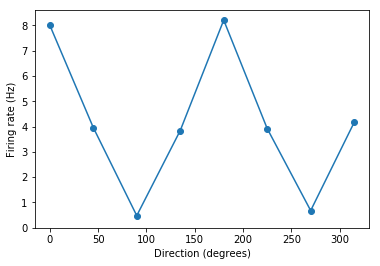

In [17]:
# Now, let us plot the tuning curve for the cell_id defined above.
# The key thing to remember here is that firing rates of the cells are stored
# in the output file tot_f_rate.dat according to the order of their cell_id.

cell_df = grating_df.ix[cell_id] # Choose the slice of the dataframe that corresponds to the cell_id.

# Build arrays (actually, lists) for plotting.
directions = []
mean_rate = []

for grating_id in sorted(grating_dict.keys()): # Make sure the directions are sorted.
    directions.append(grating_dict[grating_id])
    mean_rate.append(cell_df['grating_%d' % (grating_id)])

plt.plot(directions, mean_rate, '-o')
plt.xlabel('Direction (degrees)')
plt.ylabel('Firing rate (Hz)')
plt.ylim(bottom=0.0)
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px; \">
<h2>Homework exercises:</h2>
<p>1. Explore the directory structure created from this notebook that represents the network  
<p>2. Explore the directory components that was created for you and contains more cell types  
<p>3. Download and HDF5 viewer and explore the .h5 files created.  
<p>4. Simulate one biophysical neuron receiving a large number of balanced excitatory and inhibitory inputs. Choose a cell model other than Scnn1a or PV1. Explore the effects of changing the target locations (somatic, basal, apical) of the excitatory and inhibitory inputs.  
<p>5. We have another directory >>pointnet_notebook that shows how to use the same files and circuit created here to run a point neural network simulation. The simulator engine is NEST (http://www.nest-simulator.org/) and some changes had to be made to the config file and network description (documented in the notebook) based on NEST nomenclature requirements. Feel free to explore and play around with the notebook and NEST.
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; \">
<h2>Project Ideas:</h2>
<p>1. Compare visual responses between the Layer 4 model and Brain Observatory.  

<p>2. Find an optimal kernel for converting spikes from the Layer 4 model to Ca2+ signal, to maximize the agreeement with the Brain Observatory data.  

<p>3. Build a small-scale point-neuron network model receiving visual inputs; run simulations to explore visual responses.  

<p>4. Build a small-scale point-neuron network; explore the effect of different connectivity rules on the spatio-temporal dynamics.  

<p>5. Build a population-statistics DiPDE model analogous to the biophysical Layer 4 model.  Investigate whether similar dynamics can be obtained.  

<p>6. Build a population-statistics DiPDE model of all cortical layers.  Explore cortical dynamics in simulations.  
</div>